In [684]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import cvxpy as cp
from scipy.stats import poisson, uniform, expon, pareto
from scipy.optimize import minimize, fsolve, least_squares
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

## social cost of DSIC mechansim for two player game and various alphas
- social cost = c \cdot x
- show various values of alpha

In [979]:
n      = 2
c1     = 1.
alphas = [2,3,4]
c2s    = np.arange(1, 5, 0.1) 

In [980]:
def getDSICAllo(cs, alpha):
    den = sum([c**(-alpha) for c in cs])
    return cs**(-alpha) / den

In [981]:
getDSICAllo(np.array([1,2,2]), alpha=2.)

array([0.66666667, 0.16666667, 0.16666667])

In [982]:
xs = []
ws = []
for a in alphas:
    temp1, temp2 = [], []
    for c2 in c2s:
        cs = np.array([c1, c2])

        x = getDSICAllo(cs, alpha=a)
        w = np.dot(x, cs)

        temp1.append(x)
        temp2.append(w)
    xs.append(temp1)
    ws.append(temp2)
xs = np.array(xs)
ws = np.array(ws)
xs.shape, ws.shape

((3, 40, 2), (3, 40))

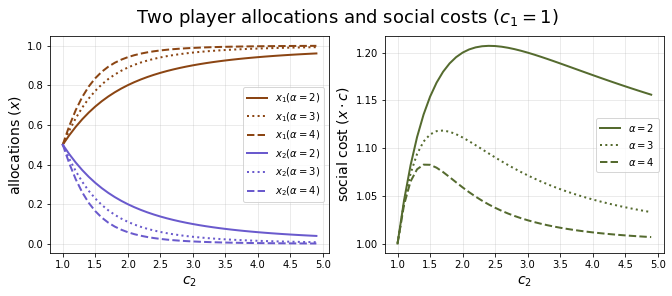

In [983]:
f, axarr = plt.subplots(ncols = 2, figsize=(11,4))

ls = ['-', ':', '--']
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,0], label=r'$x_1 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='saddlebrown', linewidth=2)
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,1], label=r'$x_2 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='slateblue', linewidth=2)

for i, alpha in enumerate(alphas):
    axarr[1].plot(c2s, ws[i,:], label=r'$\alpha={:1d}$'.format(alpha), linestyle=ls[i], 
                  color='darkolivegreen', linewidth=2)
    
for ax in axarr:
    ax.legend()
    ax.set_xlabel(r'$c_2$', size=14)
    ax.grid(alpha=0.3)
    
axarr[0].set_ylabel(r'allocations ($x$)', size=14)
axarr[1].set_ylabel(r'social cost ($x \cdot c$)', size=14)

f.suptitle(r'Two player allocations and social costs ($c_1=1$)', size=18)
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

## DSIC welfare degredation as n increases
- for 3 values of C, show the rate of social cost degredation as n increase for various values of alpha

In [957]:
alphas = [3,4,5,6,7,8,9,10]
ns     = np.arange(2, 20)

c2res  = []
for i,a in enumerate(alphas):
    temp = []
    for n in ns:
        costs = [1.]
        costs.extend([1.5]*n)
        costs = np.array(costs)

        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        temp.append(w)
    c2res.append(temp)
c2res = np.array(c2res)
c2res.shape

(8, 18)

In [958]:
c3res  = []
for i,a in enumerate(alphas):
    temp = []
    for n in ns:
        costs = [1.]
        costs.extend([2.5]*n)
        costs = np.array(costs)

        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        temp.append(w)
    c3res.append(temp)
c3res = np.array(c3res)
c3res.shape

(8, 18)

In [959]:
c4res  = []
for i,a in enumerate(alphas):
    temp = []
    for n in ns:
        costs = [1.]
        costs.extend([3.5]*n)
        costs = np.array(costs)

        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        temp.append(w)
    c4res.append(temp)
c4res = np.array(c4res)
c4res.shape

(8, 18)

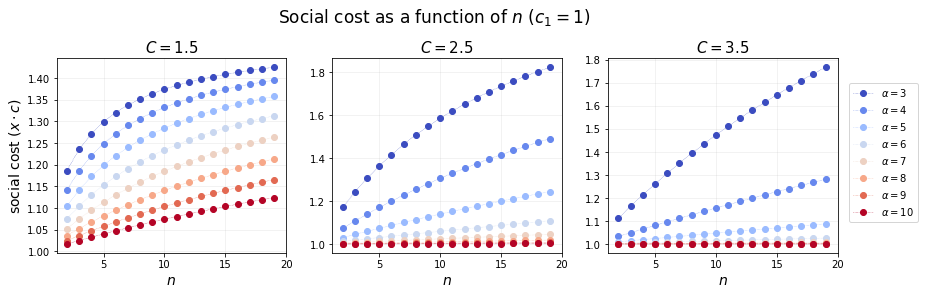

In [963]:
f, axarr = plt.subplots(ncols=3, figsize=(14, 4))

c = np.arange(1, len(alphas)+1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
cmap.set_array([])

plot_handles = []
hline_handles = []
for i,a in enumerate(alphas):
    color = cmap.to_rgba(i+1)
    line, = axarr[0].plot(ns, c2res[i], linewidth=0.5, label=r'$\alpha=${:d}'.format(a), color=color,
                  linestyle='dotted', marker='o', fillstyle='full')
    plot_handles.append(line)
    
    axarr[1].plot(ns, c3res[i], linewidth=0.5, color=color, linestyle='dotted', marker='o', fillstyle='full')
    axarr[2].plot(ns, c4res[i], linewidth=0.5, color=color, linestyle='dotted', marker='o', fillstyle='full')
    
    
handles = plot_handles + hline_handles
labels = [h.get_label() for h in handles]

for ax in axarr:
    ax.set_xlabel(r'$n$', size=14)
    ax.grid(alpha=0.2)
    ax.set_xticks([5, 10, 15, 20])
#     ax.set_yscale('log')

axarr[-1].legend(handles, labels, bbox_to_anchor=(1.2, 0.9), loc='upper center', ncol=1)

axarr[0].set_ylabel('social cost ($x \cdot c$)', size=14)
axarr[0].set_title(r'$C=1.5$', size=15)
axarr[1].set_title(r'$C=2.5$', size=15)
axarr[2].set_title(r'$C=3.5$', size=15)

f.suptitle(r'Social cost as a function of $n$ ($c_1=1$)', size=17)
plt.subplots_adjust(top=0.8)
plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## DSIC size of n to hit different degradation thresholds

In [186]:
cs = np.arange(1.1, 10, 0.01)
ns = np.arange(2, 1000)
a  = 2.

p50s, p75s, p90s, p99s = [],[],[],[]

for c in tqdm(cs):
    for n in ns:
        costs = [1.]
        costs.extend([c]*n)
        costs = np.array(costs)
        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        if w > c * 0.5:
            p50s.append(n)
            break
for c in tqdm(cs):
    for n in ns:
        costs = [1.]
        costs.extend([c]*n)
        costs = np.array(costs)
        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        if w > c * 0.75:
            p75s.append(n)
            break
for c in tqdm(cs):
    for n in ns:
        costs = [1.]
        costs.extend([c]*n)
        costs = np.array(costs)
        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        if w > c * 0.90:
            p90s.append(n)
            break
p50s = np.array(p50s)
p75s = np.array(p75s)
p90s = np.array(p90s)

p50s.shape, p75s.shape, p90s.shape

100%|██████████| 890/890 [00:21<00:00, 41.41it/s]  


((890,), (890,), (890,))

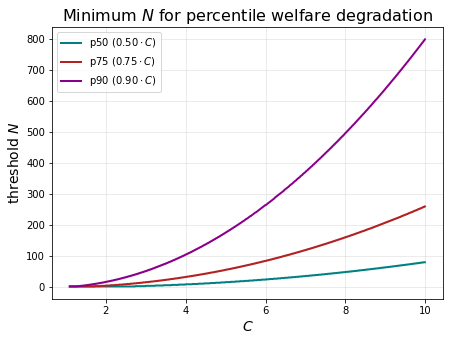

In [205]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(cs, p50s, linewidth=2, color='teal', label=r'p50 ($0.50 \cdot C$)')
ax.plot(cs, p75s, linewidth=2, color='firebrick', label=r'p75 ($0.75 \cdot C$)')
ax.plot(cs, p90s, linewidth=2, color='darkmagenta', label=r'p90 ($0.90 \cdot C$)')

ax.grid(alpha=0.3)
ax.set_xlabel(r'$C$', size=14)
ax.set_ylabel(r'threshold $N$', size=14)
ax.set_title('Minimum $N$ for percentile welfare degradation', size=16)
ax.legend()

plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## social cost of PAB mechansim for two player game and various alphas 
- social cost = \tilde{b} \cdot x
- show various values of alpha

In [490]:
def getEquilBids(cs, a, guess=None):
    n = len(cs)
    bs = [sp.Symbol('b{}'.format(i)) for i in range(n)]
    
    denom = sum([bi**(-a) for bi in bs])
    xs    = [bi**(-a)/denom for bi in bs]
    us    = [(bs[i] - cs[i])*xs[i] for i in range(n)]
    diffs = [sp.diff(us[i], bs[i]) for i in range(n)]
    funcs = [sp.lambdify(bs, diffs[i]) for i in range(n)]
    
    def eqs(bs):
        return [f(*bs) for f in funcs]
    
    initial_guess = cs
    if guess != None:
        initial_guess = guess
    
    return fsolve(eqs, initial_guess)

def getAllos(bids, a):
    denom = sum([b**(-a) for b in bids])
    return np.array(bids**(-a)) / denom

In [231]:
n      = 2
c1     = 1.
alphas = [3,4,5]
c2s    = np.arange(1, 10, 0.1) 

In [232]:
bs = []
xs = []
ws = []
for a in alphas:
    temp1, temp2, temp3 = [], [], []
    for c2 in c2s:
        cs = np.array([c1, c2])
        b  = getEquilBids(cs, a=a, guess=[c2,c2])

        x = getAllos(b, a=a)
        w = np.dot(x, cs)

        temp1.append(x)
        temp2.append(w)
        temp3.append(b)
    xs.append(temp1)
    ws.append(temp2)
    bs.append(temp3)
xs = np.array(xs)
ws = np.array(ws)
bs = np.array(bs)
xs.shape, ws.shape, bs.shape

((3, 90, 2), (3, 90), (3, 90, 2))

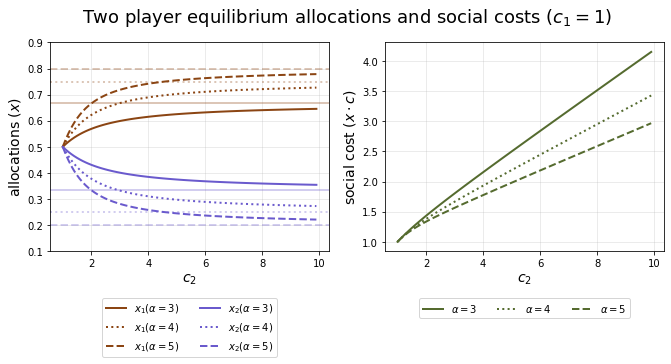

In [250]:
f, axarr = plt.subplots(ncols = 2, figsize=(11,5))

ls = ['-', ':', '--']
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,0], label=r'$x_1 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='saddlebrown', linewidth=2)
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,1], label=r'$x_2 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='slateblue', linewidth=2)
for i, alpha in enumerate(alphas):
    axarr[0].axhline(1-1/alpha, linestyle=ls[i], color='saddlebrown', linewidth=2, alpha=0.3)
    axarr[0].axhline(1/alpha, linestyle=ls[i], color='slateblue', linewidth=2, alpha=0.3)

for i, alpha in enumerate(alphas):
    axarr[1].plot(c2s, ws[i,:], label=r'$\alpha={:1d}$'.format(alpha), linestyle=ls[i], 
                  color='darkolivegreen', linewidth=2)
    
for ax in axarr:
    ax.legend()
    ax.set_xlabel(r'$c_2$', size=14)
    ax.grid(alpha=0.3)
    
axarr[0].set_ylabel(r'allocations ($x$)', size=14)
axarr[0].set_ylim(0.1,0.9)
axarr[1].set_ylabel(r'social cost ($x \cdot c$)', size=14)

axarr[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
axarr[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

f.subplots_adjust(bottom=0.3)

f.suptitle(r'Two player equilibrium allocations and social costs ($c_1=1$)', size=18)
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

## equil bids and allos of PAB mechansim for two player game and alpha=3

In [930]:
n      = 2
c1     = 1.
a      = 5
c2s    = np.arange(1, 5, 0.1) 

In [931]:
bs = []
xs_equil = []
xs_dsic  = []

for c2 in c2s:
    cs = np.array([c1, c2])
    b  = getEquilBids(cs, a=a, guess=[c2,c2])
    x = getAllos(b, a=a)

    xs_equil.append(x)
    bs.append(b)
    
    xs_dsic.append(getDSICAllo(cs, alpha=a))
    

xs_equil = np.array(xs_equil)
xs_dsic = np.array(xs_dsic)
bs = np.array(bs)
xs_equil.shape, xs_dsic.shape, bs.shape

((40, 2), (40, 2), (40, 2))

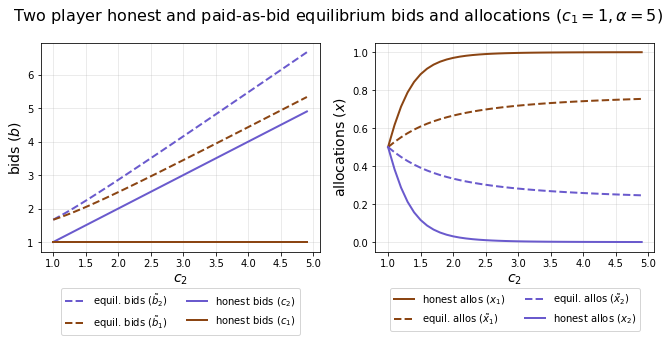

In [934]:
f, axarr = plt.subplots(ncols = 2, figsize=(11,5))

ls = ['-', ':', '--']

axarr[0].plot(c2s, bs[:,1], label=r'equil. bids $(\tilde{b}_2)$', color='slateblue', linewidth=2, 
              linestyle='--')
axarr[0].plot(c2s, bs[:,0], label=r'equil. bids $(\tilde{b}_1)$', color='saddlebrown', linewidth=2, 
              linestyle='--')
axarr[0].plot(c2s, c2s, label=r'honest bids $(c_2)$', color='slateblue', linewidth=2)
axarr[0].plot(c2s, [1]*len(c2s), label=r'honest bids $(c_1)$', color='saddlebrown', linewidth=2)

axarr[1].plot(c2s, xs_dsic[:,0], label=r'honest allos $(x_1)$', color='saddlebrown', linewidth=2, 
              linestyle='-')
axarr[1].plot(c2s, xs_equil[:,0], label=r'equil. allos $(\tilde{x}_1)$', color='saddlebrown', linewidth=2, 
              linestyle='--')
axarr[1].plot(c2s, xs_equil[:,1], label=r'equil. allos $(\tilde{x}_2)$', color='slateblue', linewidth=2, 
              linestyle='--')
axarr[1].plot(c2s, xs_dsic[:,1], label=r'honest allos $(x_2)$', color='slateblue', linewidth=2, 
              linestyle='-')

for ax in axarr:
    ax.legend()
    ax.set_xlabel(r'$c_2$', size=14)
    ax.grid(alpha=0.3)
    
axarr[0].set_ylabel(r'bids ($b$)', size=14)
axarr[1].set_ylabel(r'allocations ($x$)', size=14)

axarr[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
axarr[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

f.subplots_adjust(bottom=0.3)

f.suptitle(r'Two player honest and paid-as-bid equilibrium bids and allocations ($c_1=1,\alpha=5$)', size=16)
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

## equilibrium social cost degradation in n for various alphas

In [924]:
alphas = [3,   4,   5,   6,   7,   8,   9,   10]
loAnz  = [2.0, 2.0, 2.0, 1.7, 1.7, 1.7, 1.8, 1.8]
hiAnz  = [2.9, 3.0, 3.0, 3.0, 2.8, 3.0, 3.0, 2.8]
ns     = np.arange(2, 20)

c2res  = []
for i,a in enumerate(alphas):
    temp = []
    print(i, a)
    for n in tqdm(ns):
        costs = [1]
        guess = [loAnz[i]]
        
        costs.extend([1.5]*n)
        guess.extend([hiAnz[i]]*n)

        bids  = getEquilBids(costs, a=a, guess=guess)
        allos = getAllos(bids, a=a)

        temp.append(np.dot(costs, allos))
    c2res.append(temp)
c2res = np.array(c2res)
c2res.shape

0 3


100%|██████████| 18/18 [00:02<00:00,  8.51it/s]


1 4


100%|██████████| 18/18 [00:02<00:00,  6.70it/s]


2 5


100%|██████████| 18/18 [00:02<00:00,  8.70it/s]


3 6


100%|██████████| 18/18 [00:02<00:00,  8.68it/s]


4 7


100%|██████████| 18/18 [00:02<00:00,  8.46it/s]


5 8


100%|██████████| 18/18 [00:02<00:00,  8.53it/s]


6 9


100%|██████████| 18/18 [00:02<00:00,  8.78it/s]


7 10


100%|██████████| 18/18 [00:02<00:00,  8.09it/s]


(8, 18)

In [925]:
alphas = [3,   4,   5,   6,   7,   8,   9,   10]
loAnz  = [2.0, 2.0, 2.0, 1.7, 1.7, 1.7, 1.8, 1.8]
hiAnz  = [2.9, 3.0, 3.0, 3.0, 2.8, 3.0, 3.0, 2.8]
ns     = np.arange(2, 20)

c3res  = []
for i,a in enumerate(alphas):
    temp = []
    print(i, a)
    for n in tqdm(ns):
        costs = [1]
        guess = [loAnz[i]]
        
        costs.extend([2.5]*n)
        guess.extend([hiAnz[i]]*n)

        bids  = getEquilBids(costs, a=a, guess=guess)
        allos = getAllos(bids, a=a)

        temp.append(np.dot(costs, allos))
    c3res.append(temp)
c3res = np.array(c3res)
c3res.shape

0 3


100%|██████████| 18/18 [00:02<00:00,  8.73it/s]


1 4


100%|██████████| 18/18 [00:02<00:00,  8.96it/s]


2 5


100%|██████████| 18/18 [00:02<00:00,  8.98it/s]


3 6


100%|██████████| 18/18 [00:02<00:00,  8.86it/s]


4 7


100%|██████████| 18/18 [00:02<00:00,  7.98it/s]


5 8


100%|██████████| 18/18 [00:02<00:00,  8.79it/s]


6 9


100%|██████████| 18/18 [00:01<00:00,  9.07it/s]


7 10


100%|██████████| 18/18 [00:02<00:00,  8.84it/s]


(8, 18)

In [926]:
alphas = [3,   4,   5,   6,   7,   8,   9,   10]
loAnz  = [2.0, 2.0, 2.0, 1.7, 1.7, 1.7, 1.8, 1.8]
hiAnz  = [3.3, 3.0, 3.0, 3.0, 2.8, 3.0, 3.0, 2.8]
ns     = np.arange(2, 20)

c4res  = []
for i,a in enumerate(alphas):
    temp = []
    print(i, a)
    for n in tqdm(ns):
        costs = [1]
        guess = [loAnz[i]]
        
        costs.extend([3.5]*n)
        guess.extend([hiAnz[i]]*n)

        bids  = getEquilBids(costs, a=a, guess=guess)
        allos = getAllos(bids, a=a)

        temp.append(np.dot(costs, allos))
    c4res.append(temp)
c4res = np.array(c4res)
c4res.shape

0 3


100%|██████████| 18/18 [00:02<00:00,  8.68it/s]


1 4


100%|██████████| 18/18 [00:02<00:00,  8.63it/s]


2 5


100%|██████████| 18/18 [00:02<00:00,  8.78it/s]


3 6


100%|██████████| 18/18 [00:01<00:00,  9.14it/s]


4 7


100%|██████████| 18/18 [00:01<00:00,  9.19it/s]


5 8


100%|██████████| 18/18 [00:02<00:00,  8.58it/s]


6 9


100%|██████████| 18/18 [00:02<00:00,  7.97it/s]


7 10


100%|██████████| 18/18 [00:02<00:00,  8.90it/s]


(8, 18)

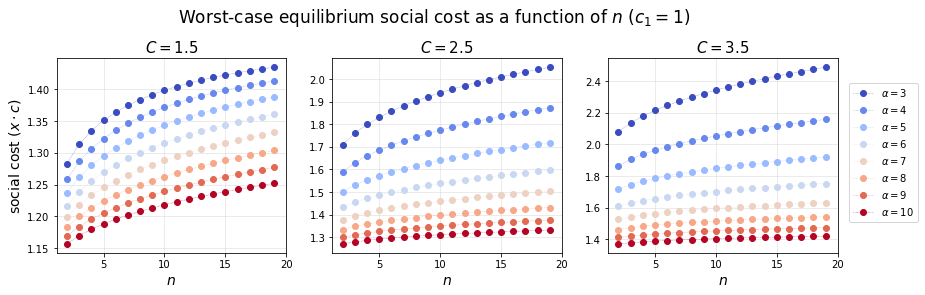

In [929]:
f, axarr = plt.subplots(ncols=3, figsize=(14, 4))

c = np.arange(1, len(alphas)+1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
cmap.set_array([])

plot_handles = []
hline_handles = []
for i,a in enumerate(alphas):
    color = cmap.to_rgba(i+1)
    line, = axarr[0].plot(ns, c2res[i], linewidth=0.5, label=r'$\alpha=${:d}'.format(a), color=color,
                  linestyle='dotted', marker='o', fillstyle='full')
    plot_handles.append(line)
    
    axarr[1].plot(ns, c3res[i], linewidth=0.5, color=color, linestyle='dotted', marker='o', fillstyle='full')
    axarr[2].plot(ns, c4res[i], linewidth=0.5, color=color, linestyle='dotted', marker='o', fillstyle='full')
    
    
handles = plot_handles + hline_handles
labels = [h.get_label() for h in handles]

for ax in axarr:
    ax.set_xlabel(r'$n$', size=14)
    ax.grid(alpha=0.3)
    ax.set_xticks([5, 10, 15, 20])
#     ax.set_yscale('log')

axarr[-1].legend(handles, labels, bbox_to_anchor=(1.2, 0.9), loc='upper center', ncol=1)

axarr[0].set_ylabel('social cost ($x \cdot c$)', size=14)
axarr[0].set_title(r'$C=1.5$', size=15)
axarr[1].set_title(r'$C=2.5$', size=15)
axarr[2].set_title(r'$C=3.5$', size=15)

f.suptitle(r'Worst-case equilibrium social cost as a function of $n$ ($c_1=1$)', size=17)
plt.subplots_adjust(top=0.8)
plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## comparing equilibrium and dsic social cost degradation in n for alpha = 3

In [317]:
ns

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [321]:
alpha = 3.

equil_sc = []
dsic_sc  = []

loAnz  = [2.0, 2.0, 2.0]
hiAnz  = [2.9, 3.1, 3.3]

for n in ns:
    temp1, temp2 = [], []
    for i, c in enumerate([1.5, 2.5, 3.5]):
        costs = [1.]
        guess = [loAnz[i]]

        costs.extend([c]*n)
        guess.extend([hiAnz[i]]*n)

        bids  = getEquilBids(costs, a=alpha, guess=guess)
        allos = getAllos(bids, a=alpha)
        temp1.append(np.dot(costs, allos))
        
        h_allos = getAllos(np.array(costs), a=alpha)
        temp2.append(np.dot(np.array(costs), h_allos))
    equil_sc.append(temp1)
    dsic_sc.append(temp2)
equil_sc = np.array(equil_sc)
dsic_sc  = np.array(dsic_sc)

In [323]:
equil_sc.shape, dsic_sc.shape

((18, 3), (18, 3))

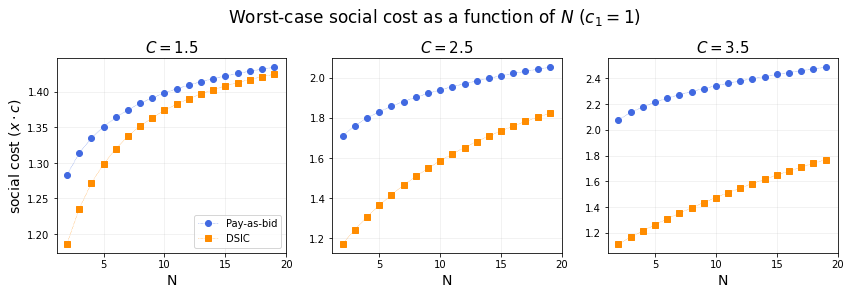

In [345]:
f, axarr = plt.subplots(ncols=3, figsize=(14, 4))

plot_handles = []
hline_handles = []


for i in range(3):
    line1, = axarr[i].plot(ns, equil_sc[:,i], linewidth=0.5, linestyle='dotted', marker='o', fillstyle='full',
                  color='royalblue', label='Pay-as-bid')
    line2, = axarr[i].plot(ns, dsic_sc[:,i], linewidth=0.5, linestyle='dotted', marker='s', fillstyle='full',
                  color='darkorange', label='DSIC')
    if i == 0:
        plot_handles.append(line1)
        plot_handles.append(line2)
        
handles = plot_handles + hline_handles
labels = [h.get_label() for h in handles]


for ax in axarr:
    ax.set_xlabel('N', size=14)
    ax.grid(alpha=0.2)
    ax.set_xticks([5, 10, 15, 20])

# axarr[-1].legend(handles, labels, bbox_to_anchor=(1.21, 0.55), loc='upper center', ncol=1)

axarr[0].legend(loc=4)
axarr[0].set_ylabel('social cost ($x \cdot c$)', size=14)
axarr[0].set_title(r'$C=1.5$', size=15)
axarr[1].set_title(r'$C=2.5$', size=15)
axarr[2].set_title(r'$C=3.5$', size=15)

f.suptitle(r'Worst-case social cost as a function of $N$ ($c_1=1$)', size=17)
plt.subplots_adjust(top=0.8)
plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## POA as a function of c2 for different N, alpha combinations

In [702]:
alphas = [3,6,9]
c2s   = np.arange(1, 5.01, 0.1)
c2s

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. ])

In [703]:
alphas = [3, 6, 9]
loAnz  = [2.0, 2.0, 1.7]
hiAnz  = [3.3, 3.0, 2.2]

In [704]:
N_ = 3
welfares = [] 
for j, alpha in enumerate(alphas):
    temp = []
    for i, c2 in enumerate(c2s):
        costs   = [1]
        costs.extend([c2]*N_)
        guess   = [loAnz[j]]
        guess.extend([hiAnz[j]]*N_)
        bids    = getEquilBids(costs, a=alpha, guess=guess)
        xTilde  = getAllos(bids, a=alpha)
        temp.append(np.dot(costs, xTilde))
    welfares.append(temp)
welfares = np.asarray(welfares)
welfares.shape

/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(3, 41)

In [705]:
alphas = [3, 6, 9]
loAnz  = [2.0, 2.0, 1.7]
hiAnz  = [3.3, 3.0, 2.2]

In [706]:
N_ = 5
welfares5 = [] 
for j, alpha in enumerate(alphas):
    temp = []
    for i, c2 in enumerate(c2s):
        costs   = [1]
        costs.extend([c2]*N_)
        guess   = [loAnz[j]]
        guess.extend([hiAnz[j]]*N_)
        bids    = getEquilBids(costs, a=alpha, guess=guess)
        xTilde  = getAllos(bids, a=alpha)
        temp.append(np.dot(costs, xTilde))
    welfares5.append(temp)
welfares5 = np.asarray(welfares5)
welfares5.shape

(3, 41)

In [707]:
alphas = [3, 6, 9]
loAnz  = [2.0, 2.0, 1.2]
hiAnz  = [2.5, 2.5, 1.7]

In [708]:
N_ = 7
welfares7 = [] 
for j, alpha in enumerate(alphas):
    temp = []
    for i, c2 in enumerate(c2s):
        costs   = [1]
        costs.extend([c2]*N_)
        guess   = [loAnz[j]]
        guess.extend([hiAnz[j]]*N_)
        bids    = getEquilBids(costs, a=alpha, guess=guess)
        xTilde  = getAllos(bids, a=alpha)
        temp.append(np.dot(costs, xTilde))
    welfares7.append(temp)
welfares7 = np.asarray(welfares7)
welfares7.shape

(3, 41)

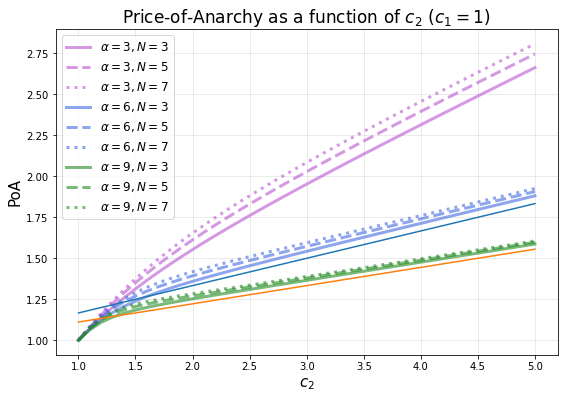

In [711]:
f, ax = plt.subplots(figsize=(9,6))

colors = ['mediumorchid', 'royalblue', 'forestgreen']
for i, alpha in enumerate(alphas):
    ax.plot(c2s, welfares[i,:], linewidth=3, alpha=0.6, 
                  label=r'$\alpha={:d},N=3$'.format(alpha), color=colors[i])
    ax.plot(c2s, welfares5[i,:], linewidth=3, alpha=0.6, 
                  label=r'$\alpha={:d},N=5$'.format(alpha), color=colors[i], linestyle='--')
    ax.plot(c2s, welfares7[i,:], linewidth=3, alpha=0.6, 
                  label=r'$\alpha={:d},N=7$'.format(alpha), color=colors[i], linestyle=':')


# ax.plot(c2s,c2s/2.8+1)
# ax.plot(c2s,c2s/3+1)
ax.plot(c2s,c2s/6+1)
ax.plot(c2s,c2s/9+1)
ax.grid(alpha=0.3)
ax.set_xlabel(r'$c_2$', size=15)
    
ax.legend(prop={'size': 12})

ax.set_ylabel('PoA', size=15)
ax.set_title(r'Price-of-Anarchy as a function of $c_2$ ($c_1=1$)', size=17)
# plt.subplots_adjust(top=0.8)

plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')

plt.show()

## social cost of tullock mechansim for two-player game and various alphas 
- social cost = \tilde{b} \cdot x
- show various values of alpha

In [491]:
def getEquilBidsTullock(cs, a, f, guess=None):
    n = len(cs)
    bs = [sp.Symbol('b{}'.format(i)) for i in range(n)]
    
    denom = sum([bi**a for bi in bs])
    xs    = [(bi**a)/denom for bi in bs]
    us    = [(f-cs[i])*xs[i]-bs[i] for i in range(n)]
    diffs = [sp.diff(us[i], bs[i]) for i in range(n)]
    funcs = [sp.lambdify(bs, diffs[i]) for i in range(n)]
    
    def eqs(bs):
        return [f(*bs) for f in funcs]
    
    initial_guess = cs
    if guess != None:
        initial_guess = guess
    
    return fsolve(eqs, initial_guess)

def getAllosTullock(bids, a):
    denom = sum([b**a for b in bids])
    return np.array(bids**a) / denom

In [678]:

def get_equil_bids_tullock(cs, alpha, f, guess=None, atol=1e-10):
    """
    Compute the unique PNE bids in a Tullock contest with heterogeneous costs.

    Parameters
    ----------
    cs : array-like
        Player-specific costs c_i  (length n, all < f).
    alpha : float  (alpha > 0)
        Contest exponent.
    f : float
        Fixed prize magnitude.
    guess : array-like or None
        Optional starting point for the solver (must be non-negative).
        If None we use 0.5 * (f - c_i) as a safe interior point.
    atol : float
        Absolute tolerance below which a bid is rounded to 0.

    Returns
    -------
    bids : ndarray shape (n,)
        Non-negative equilibrium bids that also give each player u_i ≥ 0.
    """
    cs = np.asarray(cs, dtype=float)
    n = cs.size
    if np.any(cs >= f):
        raise ValueError("Require f > c_i for every i.")

    # ------------------------------------------------------------------
    # 1. Build the symbolic first-order conditions only once.
    # ------------------------------------------------------------------
    bs_syms = sp.symbols(f"b0:{n}")
    denom_sym = sum(b**alpha for b in bs_syms)
    xs_sym = [b**alpha / denom_sym for b in bs_syms]
    us_sym = [(f - cs[i]) * xs_sym[i] - bs_syms[i] for i in range(n)]
    foc_sym = [sp.diff(us_sym[i], bs_syms[i]) for i in range(n)]

    # Lambdify for fast numeric evaluation
    foc_funcs = [sp.lambdify(bs_syms, foc_sym[i], 'numpy') for i in range(n)]
    util_funcs = [sp.lambdify(bs_syms, us_sym[i], 'numpy') for i in range(n)]

    # ------------------------------------------------------------------
    # 2. Residual = [FOCs, negative-utility penalty]
    # ------------------------------------------------------------------
    def residual(bids):
        bids = np.asarray(bids)
        foc_vals = np.array([f(*bids) for f in foc_funcs])
        util_vals = np.array([u(*bids) for u in util_funcs])
        penalty = np.clip(-util_vals, 0, np.inf)   # only if u_i < 0
        return np.concatenate([foc_vals, penalty])

    # ------------------------------------------------------------------
    # 3. Starting point (strictly positive ⇒ easier convergence)
    # ------------------------------------------------------------------
    if guess is None:
        guess = 0.5 * (f - cs)
    guess = np.maximum(guess, 1e-6)

    # ------------------------------------------------------------------
    # 4. Solve ‖residual‖² → 0 subject to bids ≥ 0
    # ------------------------------------------------------------------
    result = least_squares(
        residual,
        x0=guess,
        bounds=(0, np.inf),            # lower bound 0, no upper bound
        ftol=1e-12, xtol=1e-12, gtol=1e-12,
        max_nfev=10000
    )

    if not result.success:
        raise RuntimeError(f"Solver failed: {result.message}")

    bids = result.x
    bids[np.isclose(bids, 0, atol=atol)] = 0.0
    return bids


def get_allos_tullock(bids, alpha):
    """
    Allocation shares x_i for a given bid profile.
    """
    bids = np.asarray(bids, dtype=float)
    denom = np.sum(bids ** alpha)
    if denom == 0:
        return np.zeros_like(bids)
    return bids ** alpha / denom

In [676]:
getEquilBidsTullock(np.array([1.,1.]), a=5, f=6., guess=[5,5])

array([6.25, 6.25])

In [689]:
get_equil_bids_tullock(np.array([1.,1.5]), alpha=5, f=6.)

array([0.30570926, 0.70048285])

In [614]:
f_     = 11
n      = 2
c1     = 1.
alphas = [3,4,5]
c2s    = np.arange(1, 10, 0.1) 

In [589]:
getEquilBidsTullock(np.array([1,9.7]), a=4, f=10., guess=[0.0143, 0.011])

/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


array([0.02364919, 0.00387675])

In [615]:
bs = []
xs = []
ws = []
for a in alphas:
    temp1, temp2, temp3 = [], [], []
    for c2 in c2s:
        cs = np.array([c1, c2])
        if c2 < 5:
            guess = [c2,c2]
        elif c2 < 8:
            guess = [1,0.8]
        elif c2 < 9:
            guess = [0.12,0.05]
        else:
            guess = [0.0144,0.0103]
        b  = getEquilBidsTullock(cs, a=a, f=f_, guess=guess)

        x = getAllosTullock(b, a=a)
        w = np.dot(x, cs)

        temp1.append(x)
        temp2.append(w)
        temp3.append(b)
    xs.append(temp1)
    ws.append(temp2)
    bs.append(temp3)
xs = np.array(xs)
ws = np.array(ws)
bs = np.array(bs)
xs.shape, ws.shape, bs.shape

((3, 90, 2), (3, 90), (3, 90, 2))

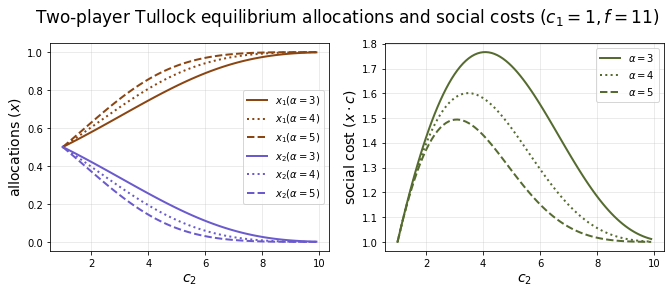

In [616]:
f, axarr = plt.subplots(ncols = 2, figsize=(11,5))

ls = ['-', ':', '--']
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,0], label=r'$x_1 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='saddlebrown', linewidth=2)
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,1], label=r'$x_2 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='slateblue', linewidth=2)

for i, alpha in enumerate(alphas):
    axarr[1].plot(c2s, ws[i,:], label=r'$\alpha={:1d}$'.format(alpha), linestyle=ls[i], 
                  color='darkolivegreen', linewidth=2)
    
for ax in axarr:
    ax.legend()
    ax.set_xlabel(r'$c_2$', size=14)
    ax.grid(alpha=0.3)
    
axarr[0].set_ylabel(r'allocations ($x$)', size=14)
# axarr[0].set_ylim(0.1,0.9)
axarr[1].set_ylabel(r'social cost ($x \cdot c$)', size=14)

# axarr[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
# axarr[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

f.subplots_adjust(bottom=0.3)

f.suptitle(r'Two-player Tullock equilibrium allocations and social costs ($c_1=1, f=11$)', size=17)
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [700]:
cs = np.array([4,2])
bs = getEquilBidsTullock(
    cs, a=1, f=5., guess=[1,0.5]
)
xs = getAllosTullock(bs, a=2)
bs, xs, np.dot(cs, xs)

(array([1.8432, 1.3824]), array([0.64, 0.36]), 1.3600000000019006)

## equil bids and allos of tullock mechansim for two player game and alpha=5

In [617]:
n      = 2
c1     = 1.
a      = 5.
f_     = 6.
c2s    = np.arange(1, 5, 0.1) 

In [621]:
bs = []
xs_equil = []
xs_dsic  = []
xs_tull  = []
bs_tull  = []

for c2 in c2s:
    cs = np.array([c1, c2])
    b  = getEquilBids(cs, a=a, guess=[c2,c2])
    x = getAllos(b, a=a)

    xs_equil.append(x)
    bs.append(b)
    
    xs_dsic.append(getDSICAllo(cs, alpha=a))
    
    b  = getEquilBidsTullock(cs, a=a, f=f_, guess=[f_-c2,f_-c2])
    xs_tull.append(getAllosTullock(b, a=a))
    bs_tull.append(b)


xs_equil = np.array(xs_equil)
xs_dsic  = np.array(xs_dsic)
xs_tull  = np.array(xs_tull)
bs       = np.array(bs)
bs_tull  = np.array(bs_tull)
xs_equil.shape, xs_dsic.shape, xs_tull.shape, bs.shape

((40, 2), (40, 2), (40, 2), (40, 2))

In [675]:
getEquilBidsTullock(np.array([1.,1.]), a=5, f=6., guess=[5,5])

array([6.25, 6.25])

In [669]:
bs_tull[0]

array([6.25, 6.25])

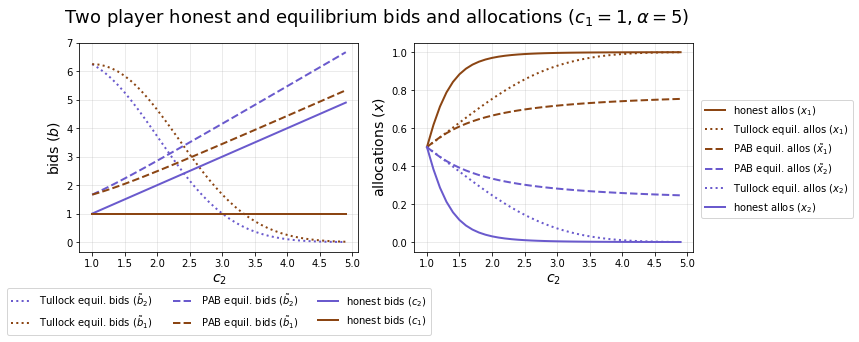

In [634]:
f, axarr = plt.subplots(ncols = 2, figsize=(11,5))

ls = ['-', ':', '--']


axarr[0].plot(c2s, bs_tull[:,1], label=r'Tullock equil. bids $(\tilde{b}_2)$', color='slateblue', linewidth=2, 
              linestyle=':')
axarr[0].plot(c2s, bs_tull[:,0], label=r'Tullock equil. bids $(\tilde{b}_1)$', color='saddlebrown', linewidth=2, 
              linestyle=':')

axarr[0].plot(c2s, bs[:,1], label=r'PAB equil. bids $(\tilde{b}_2)$', color='slateblue', linewidth=2, 
              linestyle='--')
axarr[0].plot(c2s, bs[:,0], label=r'PAB equil. bids $(\tilde{b}_1)$', color='saddlebrown', linewidth=2, 
              linestyle='--')
axarr[0].plot(c2s, c2s, label=r'honest bids $(c_2)$', color='slateblue', linewidth=2)
axarr[0].plot(c2s, [1]*len(c2s), label=r'honest bids $(c_1)$', color='saddlebrown', linewidth=2)

axarr[1].plot(c2s, xs_dsic[:,0], label=r'honest allos $(x_1)$', color='saddlebrown', linewidth=2, 
              linestyle='-')
axarr[1].plot(c2s, xs_tull[:,0], label=r'Tullock equil. allos $(x_1)$', color='saddlebrown', linewidth=2, 
              linestyle=':')
axarr[1].plot(c2s, xs_equil[:,0], label=r'PAB equil. allos $(\tilde{x}_1)$', color='saddlebrown', linewidth=2, 
              linestyle='--')
axarr[1].plot(c2s, xs_equil[:,1], label=r'PAB equil. allos $(\tilde{x}_2)$', color='slateblue', linewidth=2, 
              linestyle='--')
axarr[1].plot(c2s, xs_tull[:,1], label=r'Tullock equil. allos $(x_2)$', color='slateblue', linewidth=2, 
              linestyle=':')
axarr[1].plot(c2s, xs_dsic[:,1], label=r'honest allos $(x_2)$', color='slateblue', linewidth=2, 
              linestyle='-')

for ax in axarr:
    ax.legend()
    ax.set_xlabel(r'$c_2$', size=14)
    ax.grid(alpha=0.3)
    
axarr[0].set_ylabel(r'bids ($b$)', size=14)
axarr[1].set_ylabel(r'allocations ($x$)', size=14)

axarr[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
axarr[1].legend(loc='upper center', bbox_to_anchor=(1.3, 0.75), ncol=1)

f.subplots_adjust(bottom=0.3)

f.suptitle(r'Two player honest and equilibrium bids and allocations ($c_1=1,\alpha=5$)', size=18)
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

# PoA in between plot

In [941]:
alpha = 4
c2s   = np.arange(1.5, 2.51, 0.1)
c2s

array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5])

In [952]:
N_ = 2
welfares2 = [] 
for i, c2 in enumerate(c2s):
    costs   = [1]
    costs.extend([c2]*N_)
    
    guess   = [3.]
    guess.extend([5.]*N_)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    xTilde  = getAllos(bids, a=alpha)
    welfares2.append(np.dot(costs, xTilde))

welfares2 = np.asarray(welfares2)
welfares2.shape

(11,)

In [942]:
N_ = 4
welfares4 = [] 
for i, c2 in enumerate(c2s):
    costs   = [1]
    costs.extend([c2]*N_)
    
    guess   = [3.]
    guess.extend([5.]*N_)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    xTilde  = getAllos(bids, a=alpha)
    welfares4.append(np.dot(costs, xTilde))

welfares4 = np.asarray(welfares4)
welfares4.shape

(11,)

In [943]:
N_ = 16
welfares16 = [] 
for i, c2 in enumerate(c2s):
    costs   = [1.]
    costs.extend([c2]*N_)
    
    guess   = [2.]
    guess.extend([5.]*N_)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    xTilde  = getAllos(bids, a=alpha)
    welfares16.append(np.dot(costs, xTilde))

welfares16 = np.asarray(welfares16)
welfares16.shape

(11,)

In [944]:
N_ = 64
welfares64 = [] 
for i, c2 in enumerate(c2s):
# for i, c2 in [(0, 4.)]:
    costs   = [1.]
    costs.extend([c2]*N_)
    
    guess   = [1.]
    guess.extend([2.]*N_)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    print(bids)
    xTilde  = getAllos(bids, a=alpha)
    welfares64.append(np.dot(costs, xTilde))

welfares64 = np.asarray(welfares64)
welfares64.shape

[1.36663303 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928
 2.00989928 2.00989928 2.00989928 2.00989928 2.00989928]
[1.37558968 2.14370473 2.14370473 2.14370473 2.14370473 2.14370473
 2.14370473 2.14370473 2.14370473 2.14370473 2.14370473 2.14370473
 2.14370473 2.14370473 2.14370473 2.14370473 2.14370473 2.14370473
 2.14370473 2.14370473 2.14370473 2.14370473 2.14370473 2.14370473
 2.14

(11,)

In [945]:
N_ = 128
welfares128 = [] 
for i, c2 in enumerate(c2s):
# for i, c2 in [(0, 4.)]:
    costs   = [1.]
    costs.extend([c2]*N_)
    
    guess   = [1.]
    guess.extend([2.]*N_)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    print(bids)
    xTilde  = getAllos(bids, a=alpha)
    welfares128.append(np.dot(costs, xTilde))

welfares128 = np.asarray(welfares128)
welfares128.shape

[1.35042462 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868
 2.00506868 2.00506868 2.00506868 2.00506868 2.00506868 2.0050

[1.39309216 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047
 2.80652047 2.80652047 2.80652047 2.80652047 2.80652047 2.8065

(11,)

In [947]:
N_ = 256
welfares256 = [] 
for i, c2 in enumerate(c2s):
# for i, c2 in [(0, 4.)]:
    costs   = [1.]
    costs.extend([c2]*N_)
    
    guess   = [1.]
    guess.extend([2.]*N_)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    print(bids)
    xTilde  = getAllos(bids, a=alpha)
    welfares256.append(np.dot(costs, xTilde))

welfares256 = np.asarray(welfares256)
welfares256.shape

[1.34199761 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781
 2.00256781 2.00256781 2.00256781 2.00256781 2.00256781 2.0025

[1.35094331 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254
 2.40302254 2.40302254 2.40302254 2.40302254 2.40302254 2.4030

[1.36495875 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557
 2.80342557 2.80342557 2.80342557 2.80342557 2.80342557 2.8034

[1.38497023 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514
 3.20376514 3.20376514 3.20376514 3.20376514 3.20376514 3.2037

(11,)

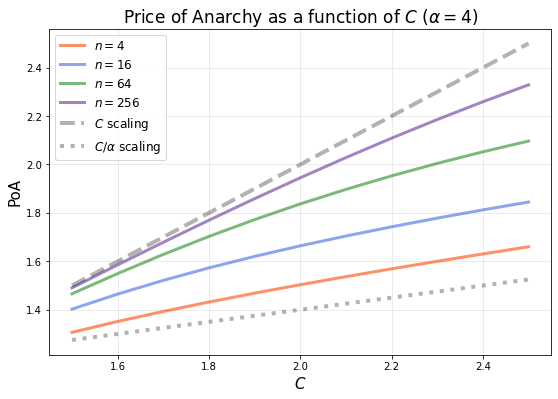

In [956]:
f, ax = plt.subplots(figsize=(9,6))

colors = ['orangered', 'royalblue', 'forestgreen', 'maroon', 'rebeccapurple']

# ax.plot(c2s, welfares2, linewidth=3, alpha=0.6, label=r'$n=4$', color=colors[0])
ax.plot(c2s, welfares4, linewidth=3, alpha=0.6, label=r'$n=4$', color=colors[0])
ax.plot(c2s, welfares16, linewidth=3, alpha=0.6, label=r'$n=16$', color=colors[1])
ax.plot(c2s, welfares64, linewidth=3, alpha=0.6, label=r'$n=64$', color=colors[2])
# ax.plot(c2s, welfares128, linewidth=3, alpha=0.6, label=r'$n=128$', color=colors[3])
ax.plot(c2s, welfares256, linewidth=3, alpha=0.6, label=r'$n=256$', color=colors[4])
    

ax.plot(c2s,c2s, linewidth=4, alpha=0.3, color='k', linestyle='--', label=r'$C$ scaling')
ax.plot(c2s,c2s/4+0.9, linewidth=4, alpha=0.3, color='k', linestyle=':', label=r'$C/\alpha$ scaling')

ax.grid(alpha=0.3)
ax.set_xlabel(r'$C$', size=15)
    
ax.legend(prop={'size': 12})

ax.set_ylabel('PoA', size=15)
ax.set_title(r'Price of Anarchy as a function of $C$ ($\alpha=4$)', size=17)
# plt.subplots_adjust(top=0.8)

plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')

plt.show()

# PoA in between plot

In [935]:
alpha = 4
ns    = np.arange(2, 50)
ns

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [936]:
c2 = 2
welfares2 = [] 
for i, n in tqdm(enumerate(ns)):
# for i, n in [(0,10)]:
    costs   = [1.]
    costs.extend([c2]*n)
    
    guess   = [1.5]
    guess.extend([2.5]*n)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    xTilde  = getAllos(bids, a=alpha)
#     print(bids)
    welfares2.append(np.dot(costs, xTilde))

welfares2 = np.asarray(welfares2)
welfares2.shape

48it [00:23,  2.04it/s]


(48,)

In [937]:
c2 = 4
welfares4 = [] 
for i, n in tqdm(enumerate(ns)):
# for i, n in [(0,5)]:
    costs   = [1.]
    costs.extend([c2]*n)
    
    guess   = [2.5]
    guess.extend([5.5]*n)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    xTilde  = getAllos(bids, a=alpha)
#     print(bids)
    welfares4.append(np.dot(costs, xTilde))

welfares4 = np.asarray(welfares4)
welfares4.shape

48it [00:23,  2.03it/s]


(48,)

In [938]:
c2 = 8
welfares8 = [] 
for i, n in tqdm(enumerate(ns)):
# for i, n in [(0,60)]:
    costs   = [1.]
    costs.extend([c2]*n)
    
    guess   = [3.5]
    guess.extend([10.5]*n)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    xTilde  = getAllos(bids, a=alpha)
#     print(bids)
    welfares8.append(np.dot(costs, xTilde))

welfares8 = np.asarray(welfares8)
welfares8.shape

48it [00:24,  1.98it/s]


(48,)

In [939]:
c2 = 16
welfares16 = [] 
for i, n in tqdm(enumerate(ns)):
# for i, n in [(0,2)]:
    costs   = [1.]
    costs.extend([c2]*n)
    
    guess   = [3.5]
    guess.extend([10.5]*n)

    bids    = getEquilBids(costs, a=alpha, guess=guess)
    xTilde  = getAllos(bids, a=alpha)
#     print(bids)
    welfares16.append(np.dot(costs, xTilde))

welfares16 = np.asarray(welfares16)
welfares16.shape

48it [00:23,  2.06it/s]


(48,)

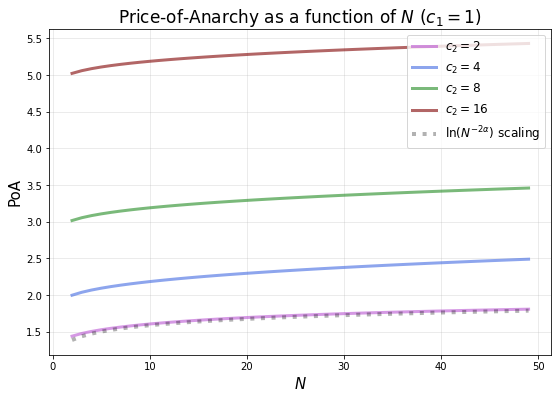

In [940]:
f, ax = plt.subplots(figsize=(9,6))

colors = ['mediumorchid', 'royalblue', 'forestgreen', 'maroon']

ax.plot(ns, welfares2, linewidth=3, alpha=0.6, label=r'$c_2=2$', color=colors[0])
ax.plot(ns, welfares4, linewidth=3, alpha=0.6, label=r'$c_2=4$', color=colors[1])
ax.plot(ns, welfares8, linewidth=3, alpha=0.6, label=r'$c_2=8$', color=colors[2])
ax.plot(ns, welfares16, linewidth=3, alpha=0.6, label=r'$c_2=16$', color=colors[3])
    

# ax.plot(ns,np.log(ns**(1/4))+2.5, linewidth=4, alpha=0.3, color='k', linestyle='--', 
#         label=r'$\ln(N^{-\alpha})$ scaling')
ax.plot(ns,np.log(ns**(1/8))+1.3, linewidth=4, alpha=0.3, color='k', linestyle=':', 
        label=r'$\ln(N^{-2\alpha})$ scaling')

ax.grid(alpha=0.3)
ax.set_xlabel(r'$N$', size=15)
    
ax.legend(prop={'size': 12})

ax.set_ylabel('PoA', size=15)
ax.set_title(r'Price-of-Anarchy as a function of $N$ ($c_1=1$)', size=17)
# plt.subplots_adjust(top=0.8)

plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')

plt.show()

## symmetric stuff

In [905]:
def tullockSymBids(n, alpha, v):
    return a * v * (n-1) / n**2

## Tullock equilibrium social cost degradation in n for various alphas

In [ ]:
getEquilBidsTullock(costs, a=a, f=f_, guess=guess)

In [651]:
alphas = [3,   4,   5,   6,   7,   8,   9,   10]
loAnz  = [1.8, 1.8, 2.0, 1.7, 1.7, 1.7, 1.8, 1.8]
hiAnz  = [1.2, 1.2, 1.8, 1.8, 1.7, 1.6, 1.4, 1.4]
ns     = np.arange(2, 20)
f_     = 2.

c2res  = []
# for i,a in enumerate(alphas):
for i,a in [(0,3)]:
    temp = []
    print(i, a)
#     for n in tqdm(ns):
    for n in [3]:
        costs = [1]
        guess = [loAnz[i]]
        
        costs.extend([1.5]*n)
        guess.extend([hiAnz[i]]*n)

        bids  = getEquilBidsTullock(costs, a=a, f=f_, guess=guess)
        allos = getAllosTullock(bids, a=a)
        print(bids,allos,np.dot(costs, allos))

        temp.append(np.dot(costs, allos))
    c2res.append(temp)
c2res = np.array(c2res)
c2res.shape

0 3
[0.98388426 0.87438855 0.87438856 0.87438856] [0.32198553 0.22600482 0.22600483 0.22600482] 1.339007235153589


(1, 1)

In [306]:
alphas = [3,   4,   5,   6,   7,   8,   9,   10]
loAnz  = [2.0, 2.0, 2.0, 1.7, 1.7, 1.7, 1.8, 1.8]
hiAnz  = [2.9, 3.0, 3.0, 3.0, 2.8, 3.0, 3.0, 2.8]
ns     = np.arange(2, 20)

c3res  = []
for i,a in enumerate(alphas):
    temp = []
    print(i, a)
    for n in tqdm(ns):
        costs = [1]
        guess = [loAnz[i]]
        
        costs.extend([2.5]*n)
        guess.extend([hiAnz[i]]*n)

        bids  = getEquilBids(costs, a=a, guess=guess)
        allos = getAllos(bids, a=a)

        temp.append(np.dot(costs, allos))
    c3res.append(temp)
c3res = np.array(c3res)
c3res.shape

0 3


100%|██████████| 18/18 [00:01<00:00,  9.16it/s]


1 4


100%|██████████| 18/18 [00:01<00:00,  9.11it/s]


2 5


100%|██████████| 18/18 [00:02<00:00,  8.89it/s]


3 6


100%|██████████| 18/18 [00:01<00:00,  9.21it/s]


4 7


100%|██████████| 18/18 [00:01<00:00,  9.47it/s]


5 8


100%|██████████| 18/18 [00:01<00:00,  9.47it/s]


6 9


100%|██████████| 18/18 [00:01<00:00,  9.69it/s]


7 10


100%|██████████| 18/18 [00:01<00:00,  9.08it/s]


(8, 18)

In [310]:
alphas = [3,   4,   5,   6,   7,   8,   9,   10]
loAnz  = [2.0, 2.0, 2.0, 1.7, 1.7, 1.7, 1.8, 1.8]
hiAnz  = [3.3, 3.0, 3.0, 3.0, 2.8, 3.0, 3.0, 2.8]
ns     = np.arange(2, 20)

c4res  = []
for i,a in enumerate(alphas):
    temp = []
    print(i, a)
    for n in tqdm(ns):
        costs = [1]
        guess = [loAnz[i]]
        
        costs.extend([3.5]*n)
        guess.extend([hiAnz[i]]*n)

        bids  = getEquilBids(costs, a=a, guess=guess)
        allos = getAllos(bids, a=a)

        temp.append(np.dot(costs, allos))
    c4res.append(temp)
c4res = np.array(c4res)
c4res.shape

0 3


100%|██████████| 18/18 [00:01<00:00,  9.42it/s]


1 4


100%|██████████| 18/18 [00:01<00:00,  9.16it/s]


2 5


100%|██████████| 18/18 [00:02<00:00,  8.90it/s]


3 6


100%|██████████| 18/18 [00:01<00:00,  9.18it/s]


4 7


100%|██████████| 18/18 [00:01<00:00,  9.40it/s]


5 8


100%|██████████| 18/18 [00:01<00:00,  9.30it/s]


6 9


100%|██████████| 18/18 [00:01<00:00,  9.34it/s]


7 10


100%|██████████| 18/18 [00:01<00:00,  9.16it/s]


(8, 18)

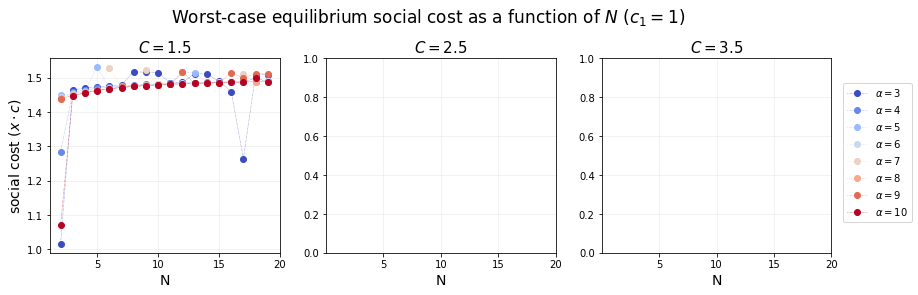

In [636]:
f, axarr = plt.subplots(ncols=3, figsize=(14, 4))

c = np.arange(1, len(alphas)+1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
cmap.set_array([])

plot_handles = []
hline_handles = []
for i,a in enumerate(alphas):
    color = cmap.to_rgba(i+1)
    line, = axarr[0].plot(ns, c2res[i], linewidth=0.5, label=r'$\alpha=${:d}'.format(a), color=color,
                  linestyle='dotted', marker='o', fillstyle='full')
    plot_handles.append(line)
    
#     axarr[1].plot(ns, c3res[i], linewidth=0.5, color=color, linestyle='dotted', marker='o', fillstyle='full')
#     axarr[2].plot(ns, c4res[i], linewidth=0.5, color=color, linestyle='dotted', marker='o', fillstyle='full')
    
    
handles = plot_handles + hline_handles
labels = [h.get_label() for h in handles]

for ax in axarr:
    ax.set_xlabel('N', size=14)
    ax.grid(alpha=0.2)
    ax.set_xticks([5, 10, 15, 20])
#     ax.set_yscale('log')

axarr[-1].legend(handles, labels, bbox_to_anchor=(1.2, 0.9), loc='upper center', ncol=1)

axarr[0].set_ylabel('social cost ($x \cdot c$)', size=14)
axarr[0].set_title(r'$C=1.5$', size=15)
axarr[1].set_title(r'$C=2.5$', size=15)
axarr[2].set_title(r'$C=3.5$', size=15)

f.suptitle(r'Worst-case equilibrium social cost as a function of $N$ ($c_1=1$)', size=17)
plt.subplots_adjust(top=0.8)
plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

In [667]:
cs = np.array([1,2.5,2.5,2.5])
bs = getEquilBidsTullock(
    cs, a=3, f=3., guess=[1.9, 0.5, 0.5, 0.5]
)
xs = getAllosTullock(bs, a=3)
bs, xs, np.dot(cs, xs)

(array([0.13684673, 0.32935025, 0.32935025, 0.32935025]),
 array([0.02335316, 0.32554895, 0.32554895, 0.32554895]),
 2.4649702612662105)